<h1>Guided Project: Data Analysis of Indicators of I-94 Traffic</h1>

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has over 48,000 entries and 9 columns. There does not appear to be any null values in the set. There are several string data types.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

<h2>Analyzing Traffic Volume</h2>

In [4]:
import matplotlib.pyplot as plt
# add matplotlib magic
%matplotlib inline

traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

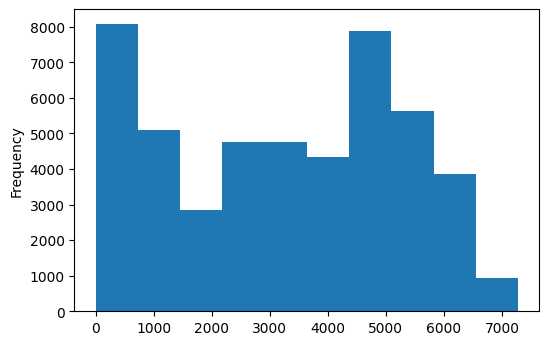

In [5]:
traffic['traffic_volume'].plot.hist()

Based on the output above, the `traffic_volume` column has a random distribution with a slight right skew and two local high frequencies at 4500-5000 and 0-500. These peaks may represent peak traffic times (during work commutes) and overnight times, respectively.

<h2>Traffic Volume: Day vs Night</h2>

Let's divide the dataset into daytime (7am - 7pm) and nighttime (7pm - 7am) periods.

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [7]:
daytime = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <19)]
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [8]:
nighttime = traffic.copy()[(traffic['date_time'].dt.hour <7) | (traffic['date_time'].dt.hour >= 19)]
nighttime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


Now that we separated day and night hours, we can compare the volume between day and night traffic.

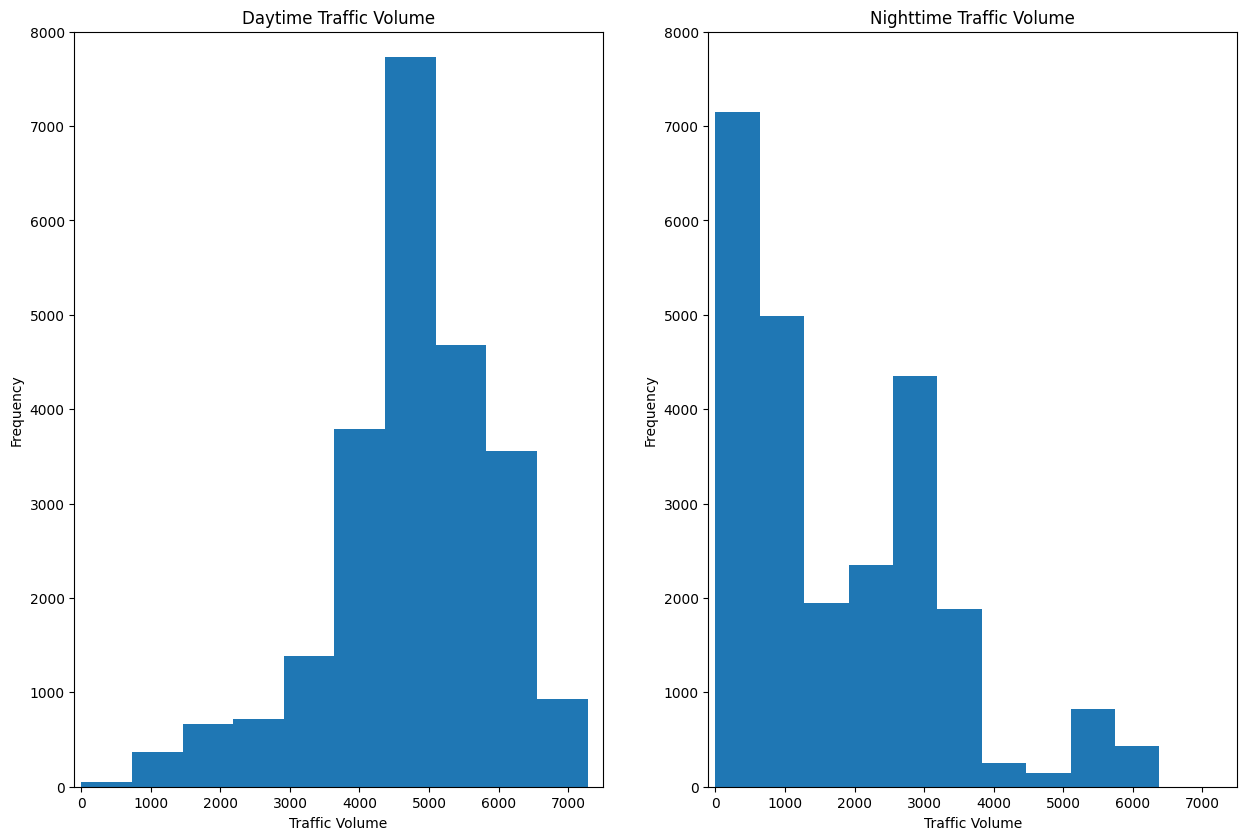

In [23]:
# setup grid chart
plt.figure(figsize=(15,10))

# subplot 1
plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([-100, 7500])
plt.ylim([0,8000])

# subplot 2
plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([-100, 7500])
plt.ylim([0,8000])

plt.show()

Above are histograms for frequency of traffic volume during day and night hours. The most common daytime volume is around 5000 cars with a somewhat normal distribution. Nighttime volume is left skewed with the majority of the volume being less than 3000.

Going forward we will focus on day traffic only as this is where the heavier traffic is, and we are seeking indicators of heavy traffic.

Next we will generate line plots to look at the time series data during the day to see when the heaviest volume occurs during the daytime. We will look at (1) month, (2) day of week and (3) time of day.

<h2>Indicators of Time</h2>

In [30]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

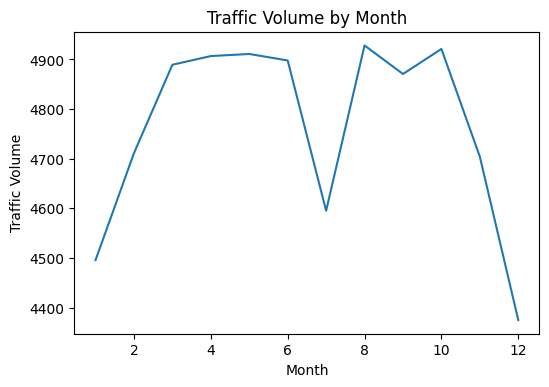

In [35]:
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

The traffic by month looks uniform except for drops in January, July and December. This is consistent with less volume during colder months except for July. 

Next let's look at the day of the week:

In [37]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

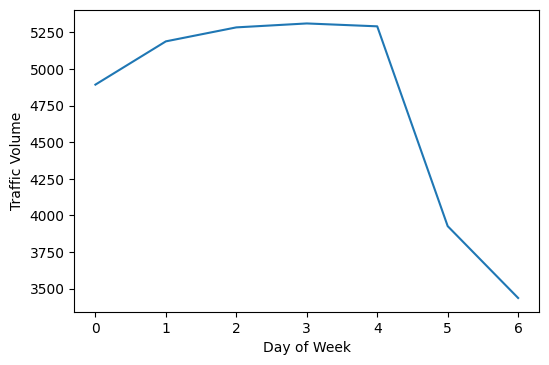

In [38]:
by_dayofweek['traffic_volume'].plot.line()
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.show()

This time series makes sense as there is noticeably less traffic on the weekends (days 5 and 6 of the week).

Now by the hour, but we will look at weekends separately since there is a difference there by day of week.

In [39]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayofweek'] <= 4] # 0-4 is mon-fri
weekend = daytime.copy()[daytime['dayofweek'] > 4] # weekend is 5 or 6
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


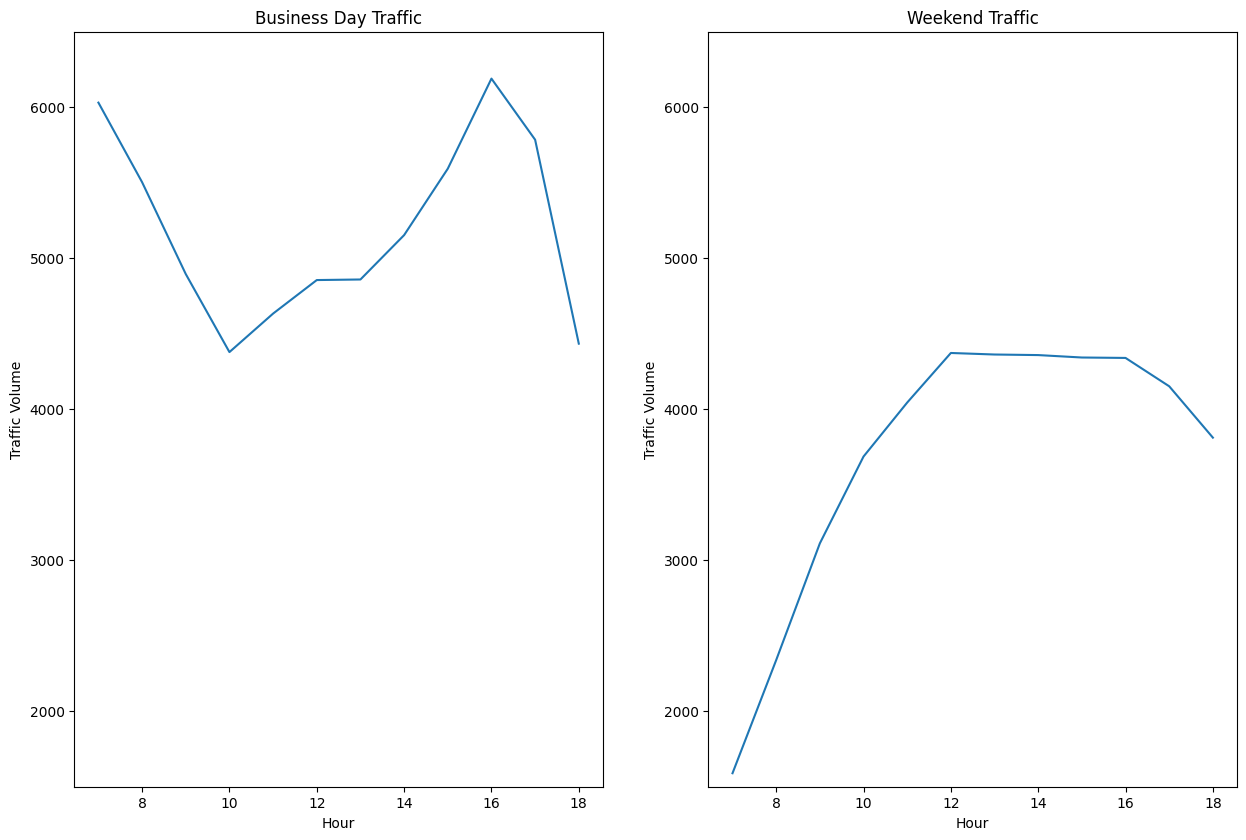

In [43]:
plt.figure(figsize=(15,10))

#Business
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Business Day Traffic')
plt.ylim([1500, 6500])

#Weekend
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Weekend Traffic')
plt.ylim([1500, 6500])

plt.show()

Comparing the grid chart above we see that business traffic is significantly higher than weekend traffic during the day. Specifically, there are peaks in business traffic around 7am and 5pm, coinciding with rush hour. The weekend volume has a steady peak from 12pm through 5pm coinciding with daytime travel on weekends.

<h2>Weather Indicators</h2>

Another possible indicator of heavy traffic may be weather. Let's look at the correlation with traffic volume among some of the numerical weather-related variables.

In [50]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Traffic volume has the strongest correlation with `temp` out of all the weather related variables though it is quite weak.

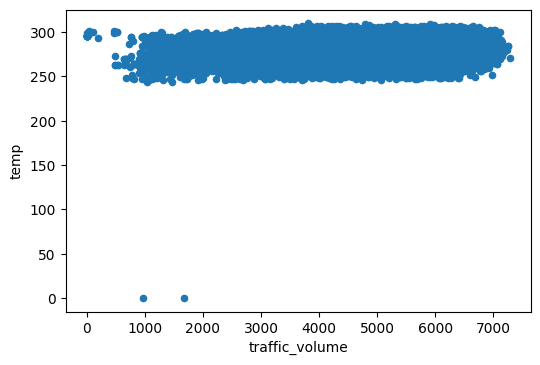

In [52]:
daytime.plot.scatter('traffic_volume', 'temp')

There is not a significant relationship between these variables as we suspected. Let's look at the non-numeric weather columns now.

<h2>Weather Types</h2>

We're going to calculate the average traffic volume associated with each unique value in these two columns. 

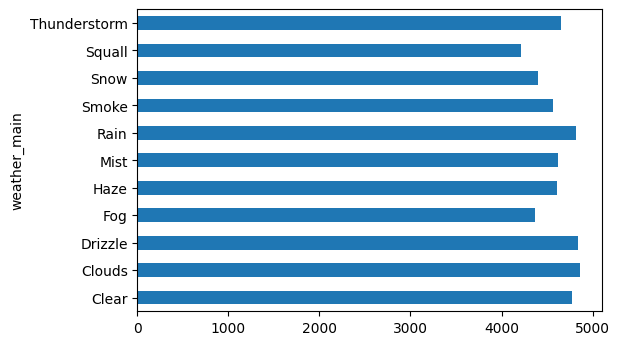

In [58]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()

We cannot see any particular weather type as a significant indicator of heavy traffic. All the types range from 4,000 to 5,000 in valume.

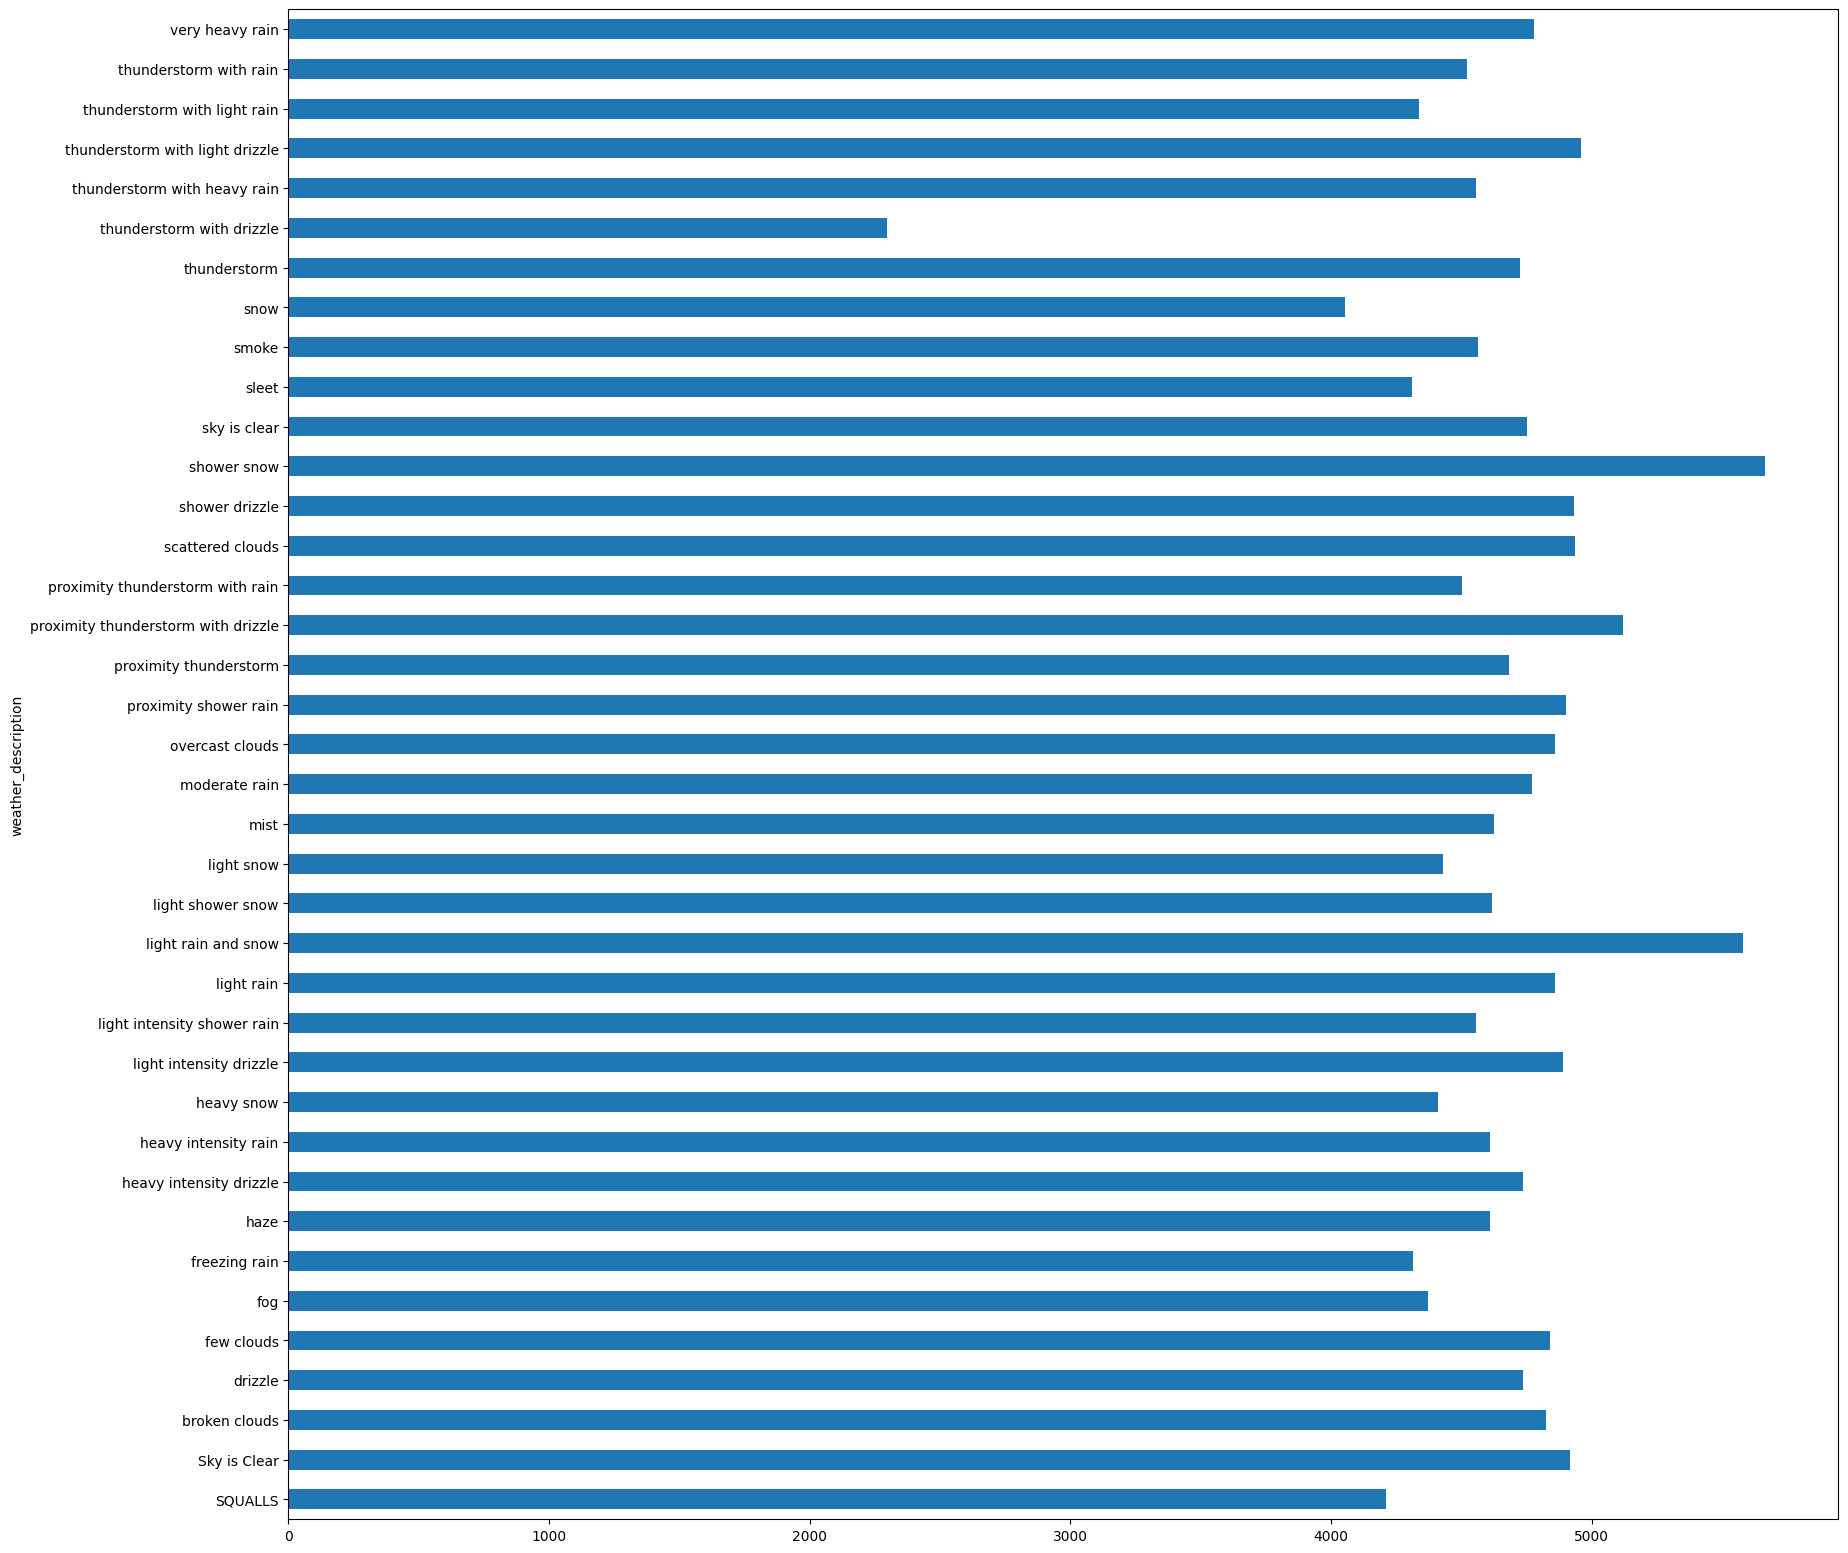

In [61]:
by_weather_description['traffic_volume'].plot.barh(figsize=(20,20))

Light rain/snow and snow showers may be variables worth considering as indicators of heavy traffic since they are both above 5,000 in volume and significantly above the mean of the other variables.

<h1>Conclusion</h1>

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

<h3>Time indicators</h3>
<ul>
    <li>The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).</li>
    <li>The traffic is usually heavier on business days compared to the weekends.</li>
<li>On business days, the rush hours are around 7 and 16.</li>
</ul>

<h3>Weather indicators</h3>
<ul>
    <li>Shower snow</li>
    <li>Light rain and snow</li>
    <li>Proximity thunderstorm with drizzle</li>